In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
# Load the entire dataset into a pandas dataframe

df = pd.read_parquet('/nobackup/amimalik/bits/dataset/dimensions/4Q/working_dataset.parquet')
model_df = pd.read_csv('/nobackup/amimalik/bits/dataset/dimensions/4Q/sorted_failures.csv')

model_df = model_df.head(5)

In [3]:
def get_model_data(df, model):
    model_df = df[df['model'] == model]
    model_df = model_df.drop(columns=['model'])
    model_df.drop(columns=['serial_number'], inplace=True)
    return model_df

In [4]:
def get_clean_data(df):
    test = df.isnull().sum()
    d_col = []
    for k in test.keys():
        if test[k] == df.shape[0]:
            d_col.append(k)
    df.drop(columns=d_col, inplace=True)
    # replace null by mean values
    for col in df.columns:
        df[col].fillna(df[col].mean(), inplace=True)
    return df

In [5]:
# Create a heatmap

def map_model_data(df, model):
    corr_matrix = df.corr()

    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

    # Set the title and display the plot
    plt.title('Correlation Heatmap for ' + model)
    plt.show()

In [6]:
def pairplot_model_data(df, model):
    sns.pairplot(df, hue='failure' , corner=True)
    plt.title('Pairplot for ' + model)
    plt.show()

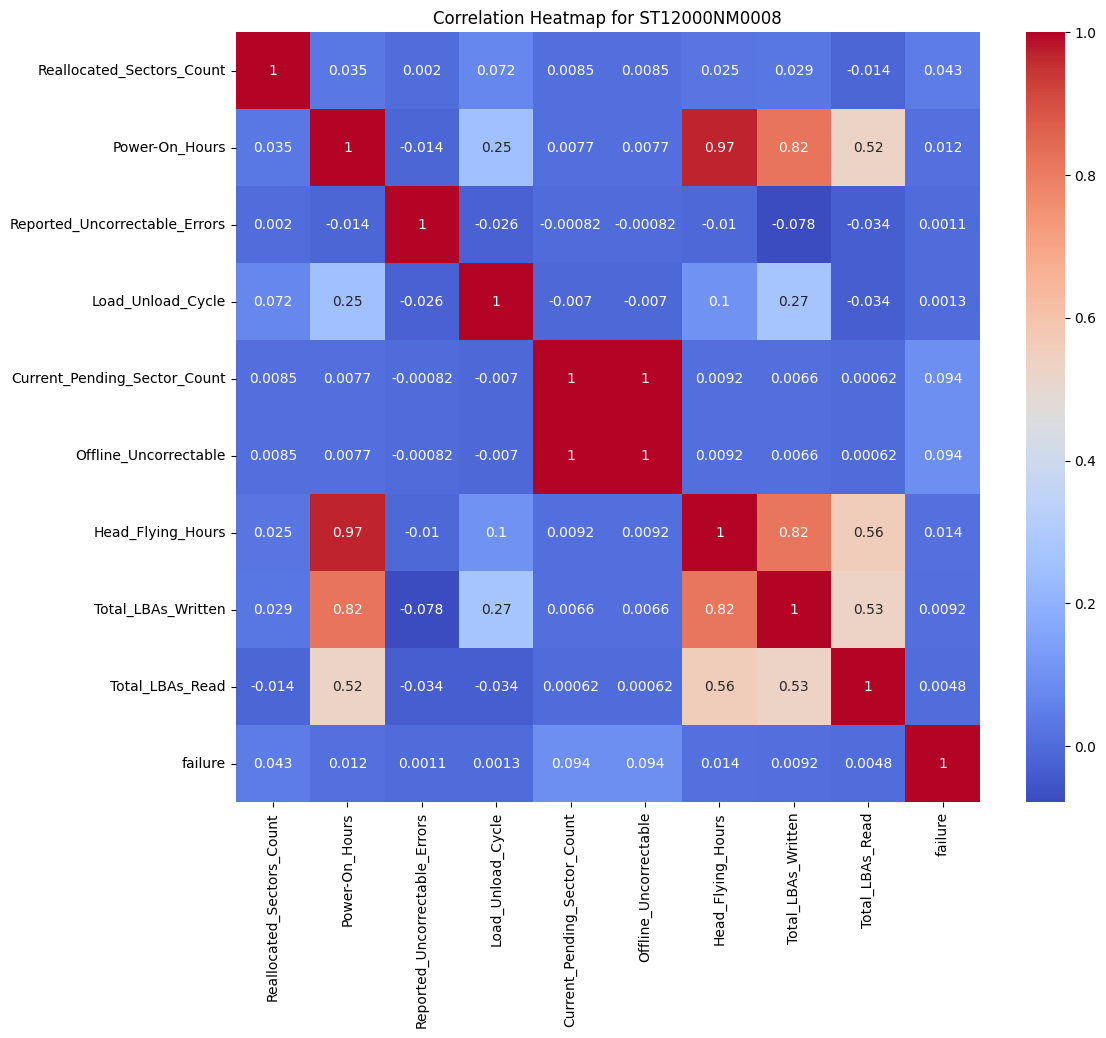

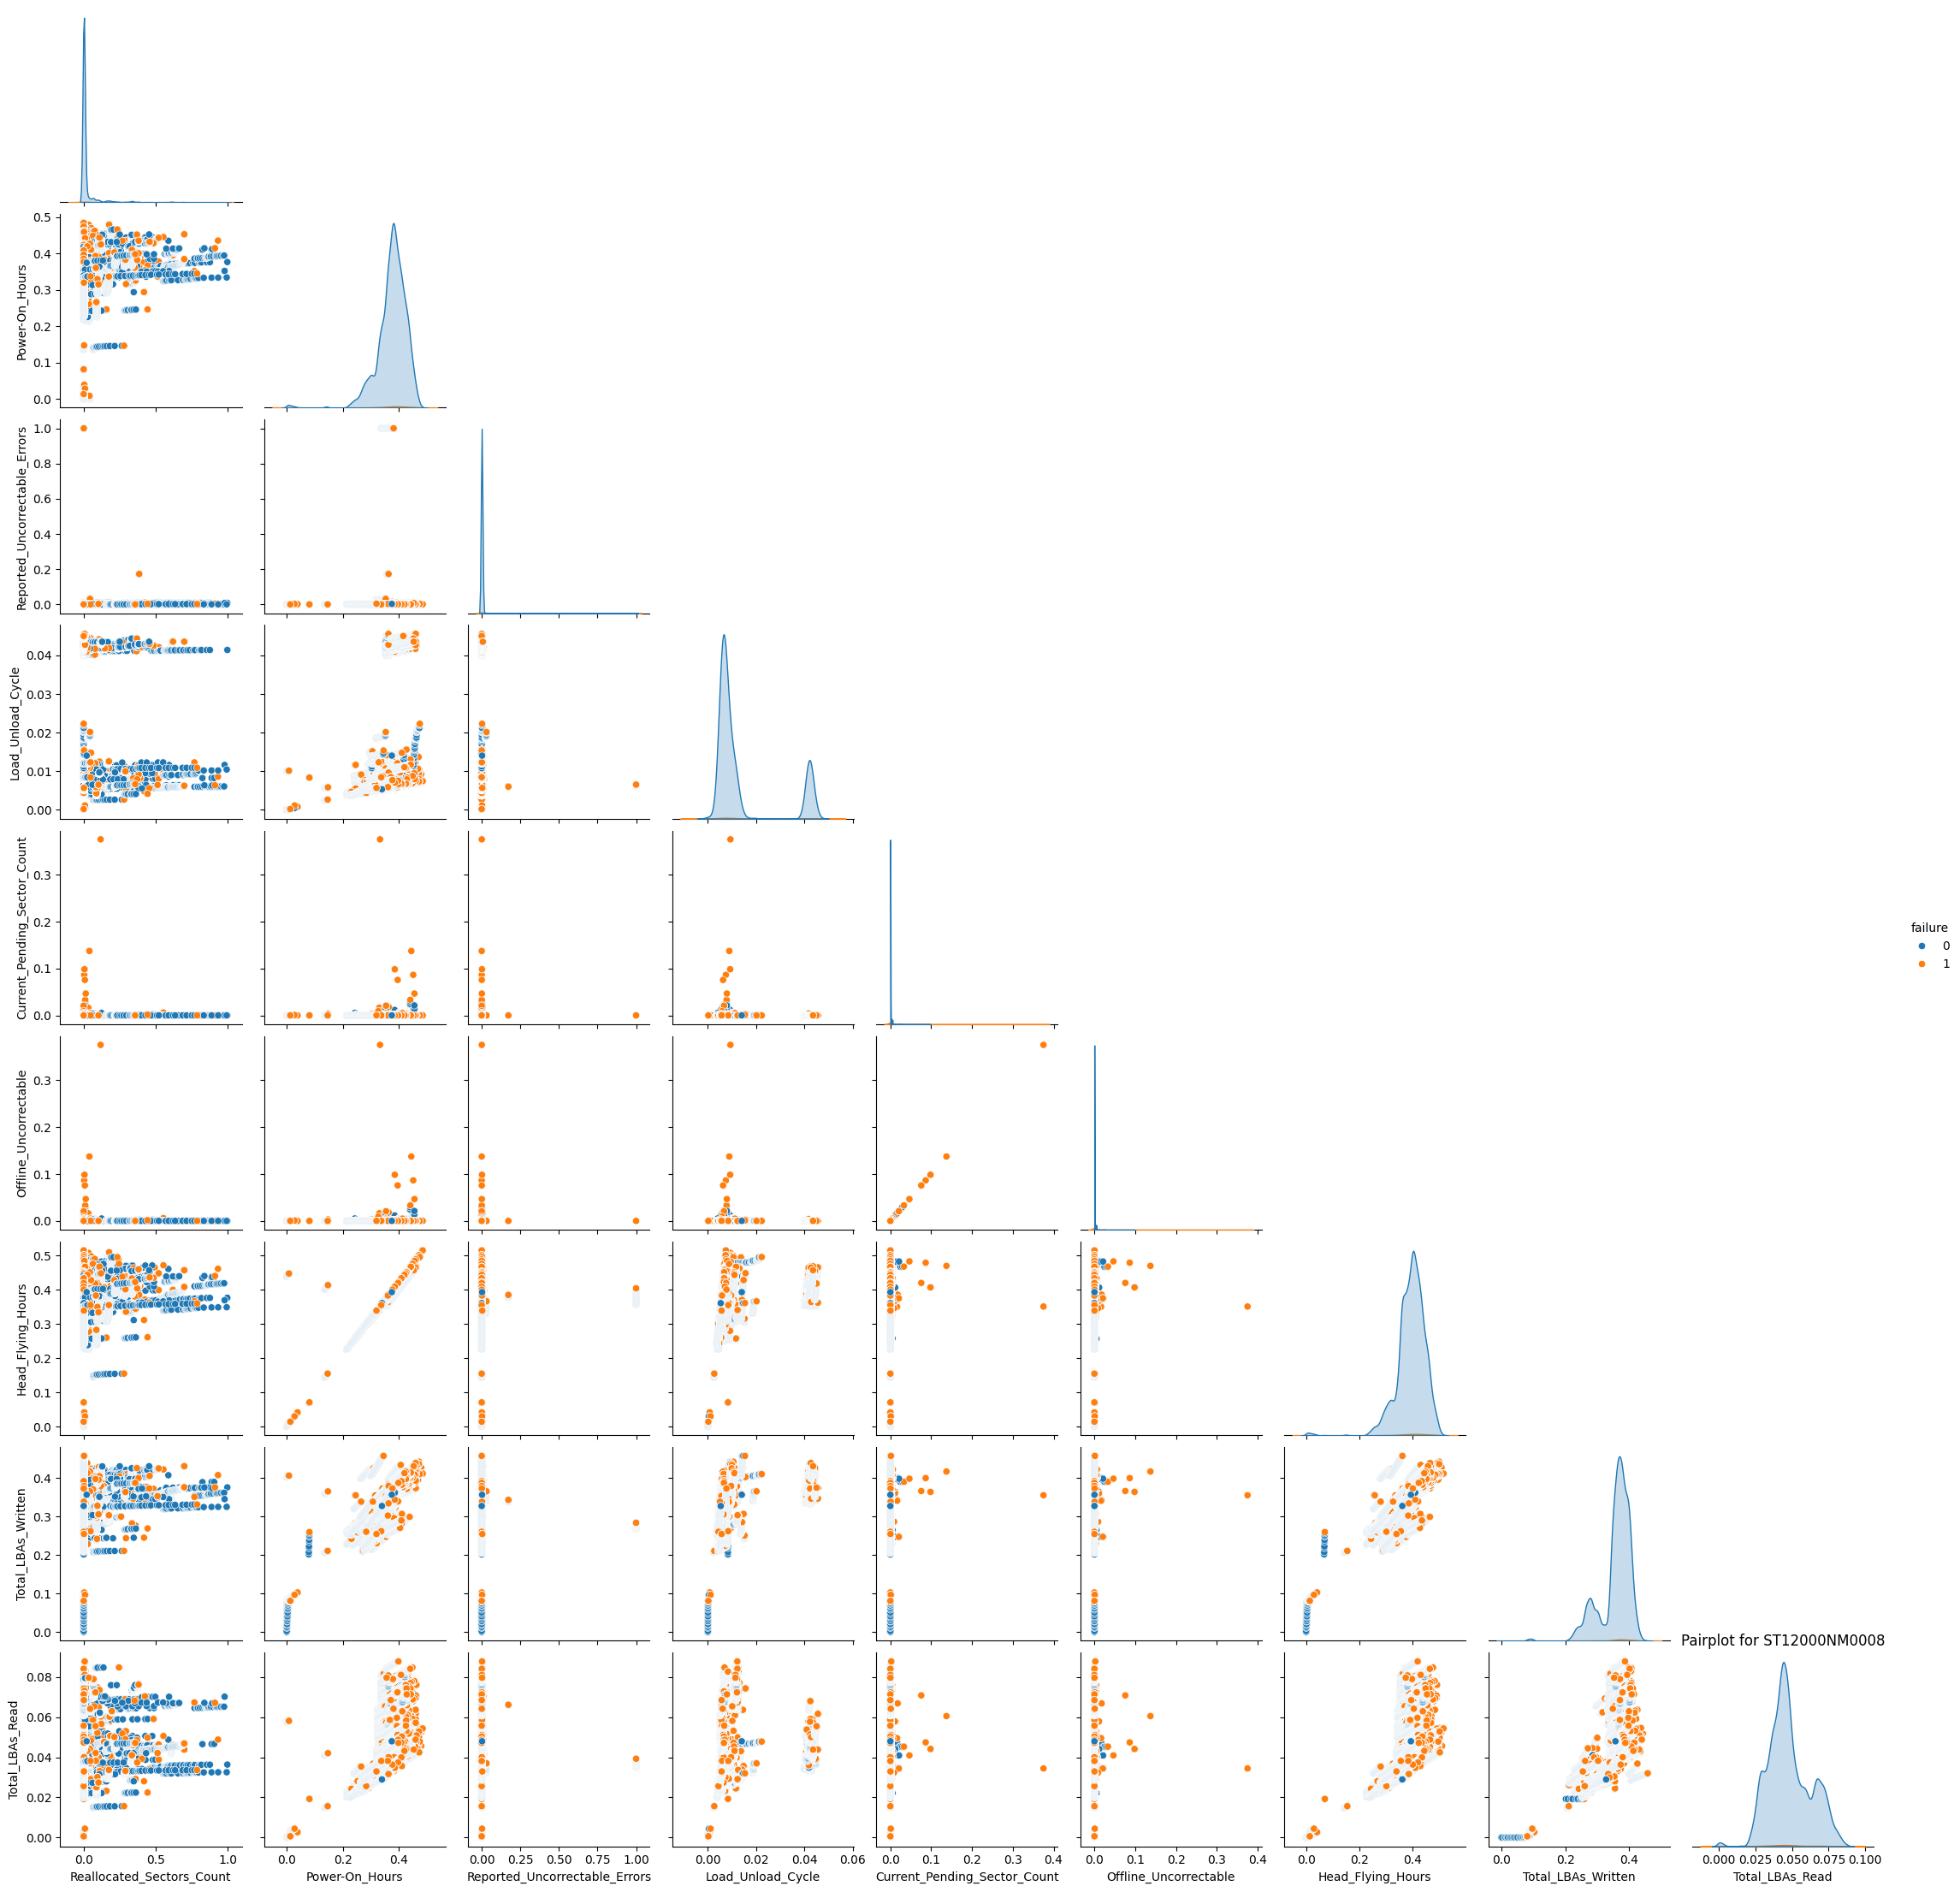

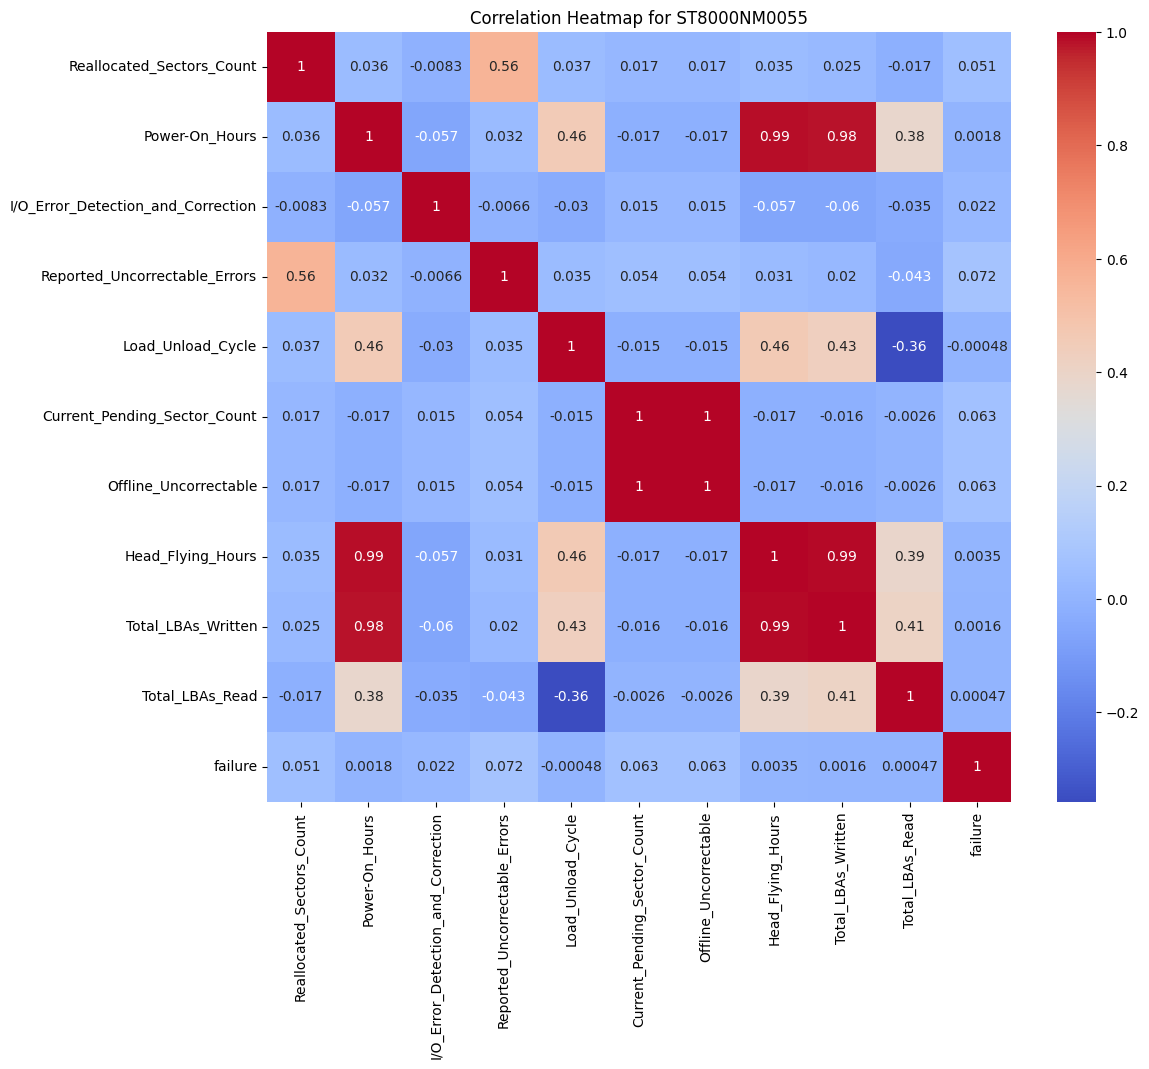

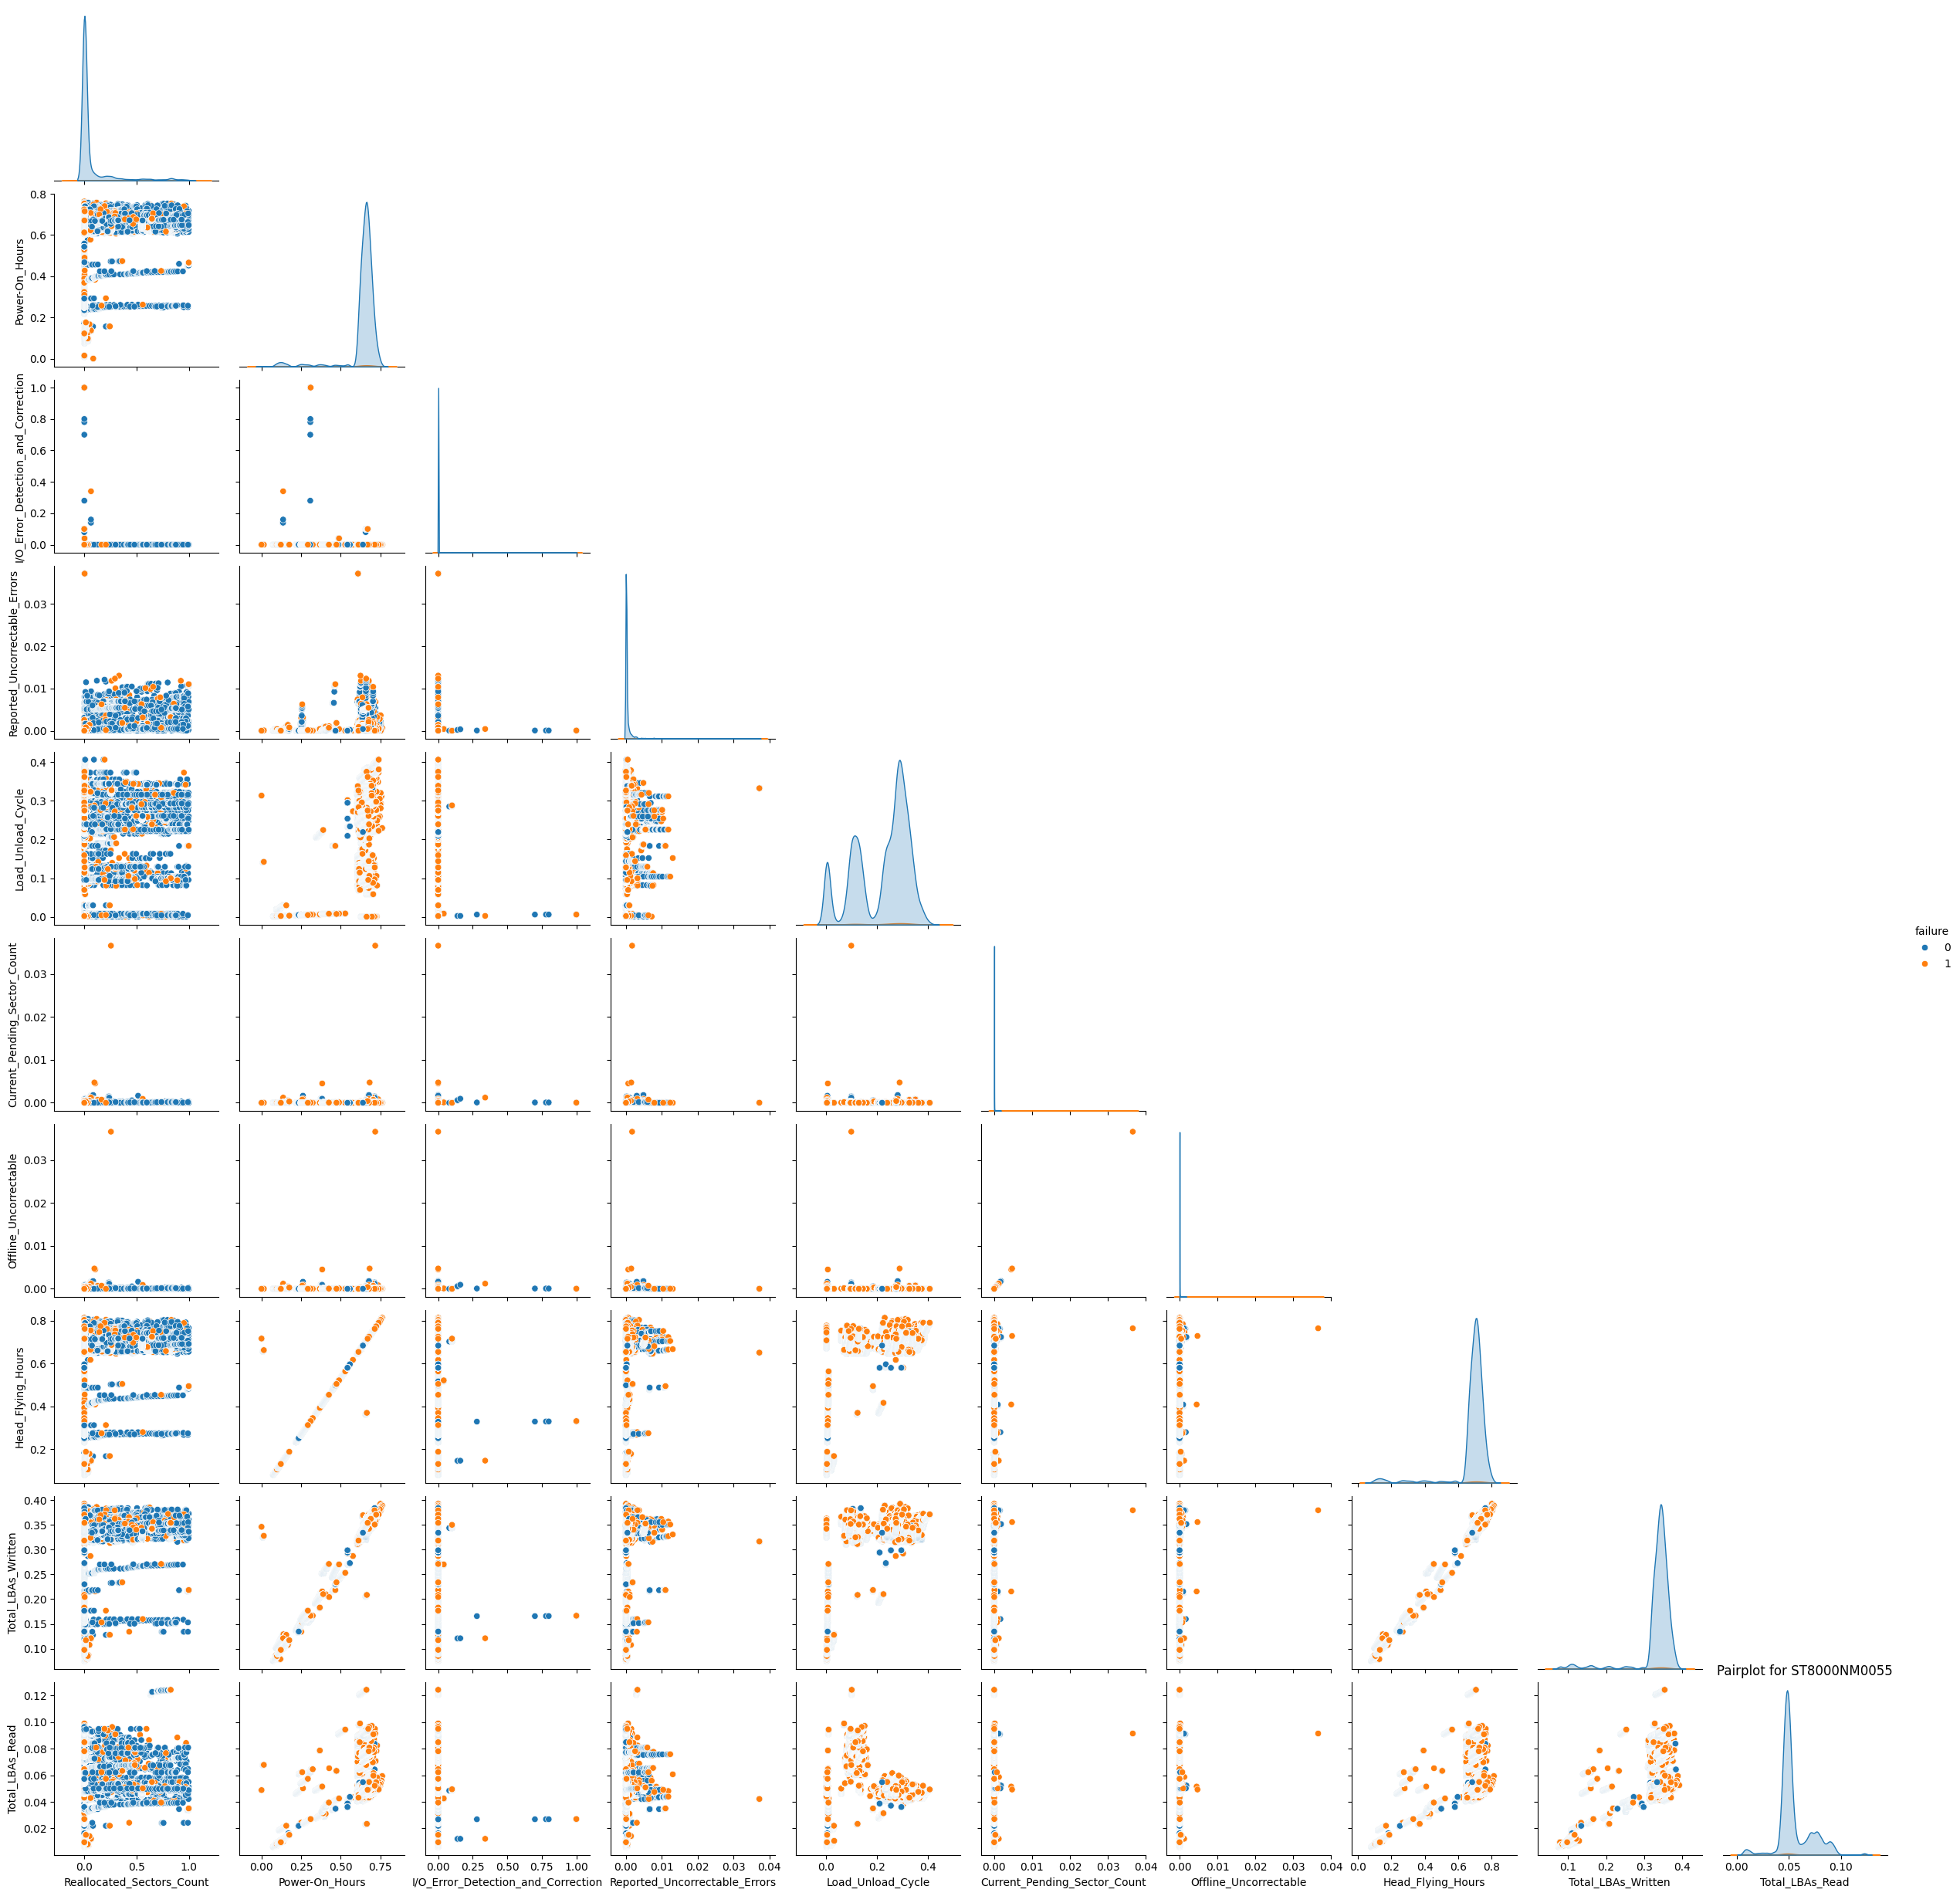

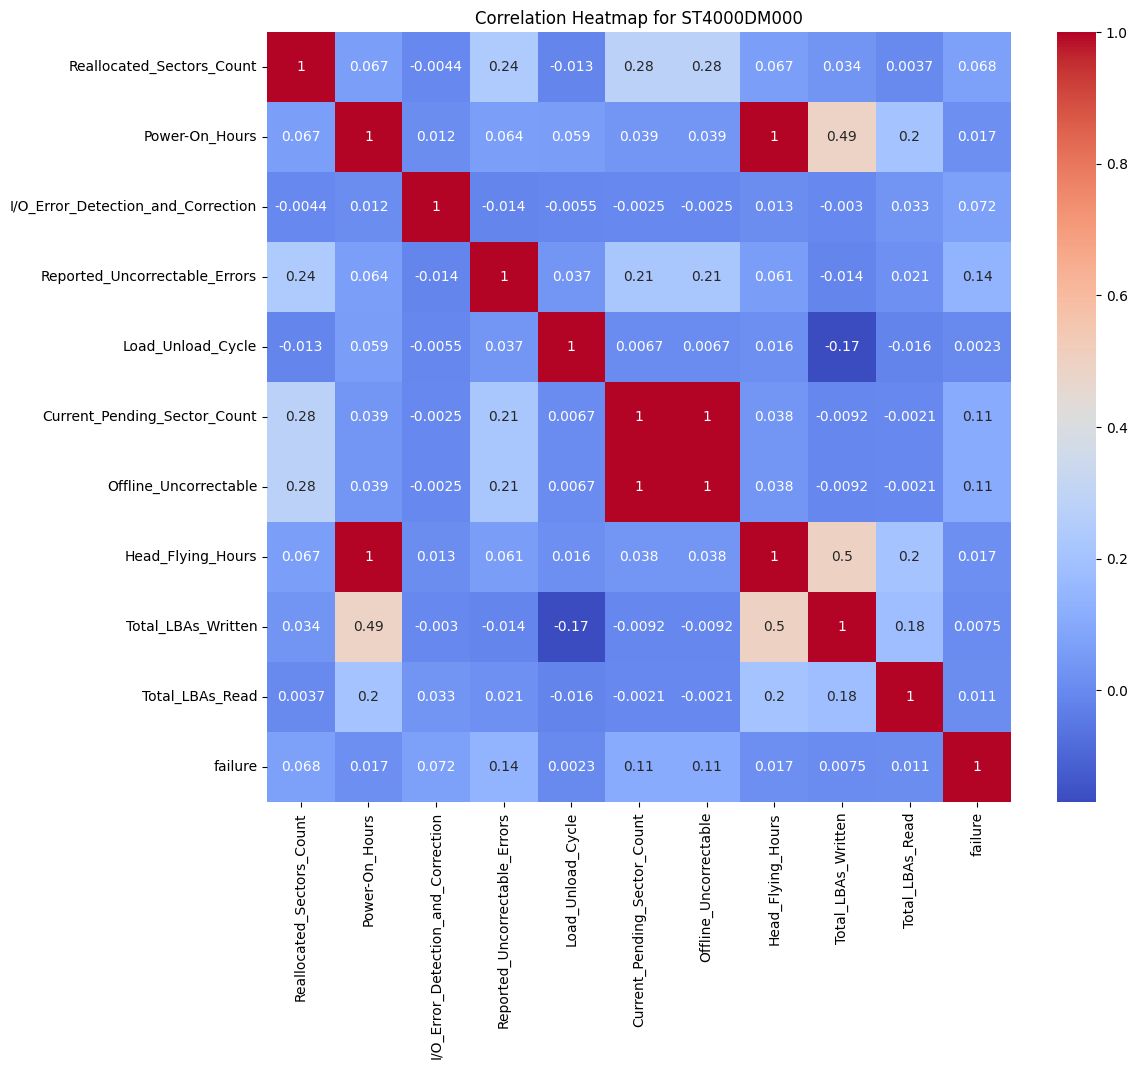

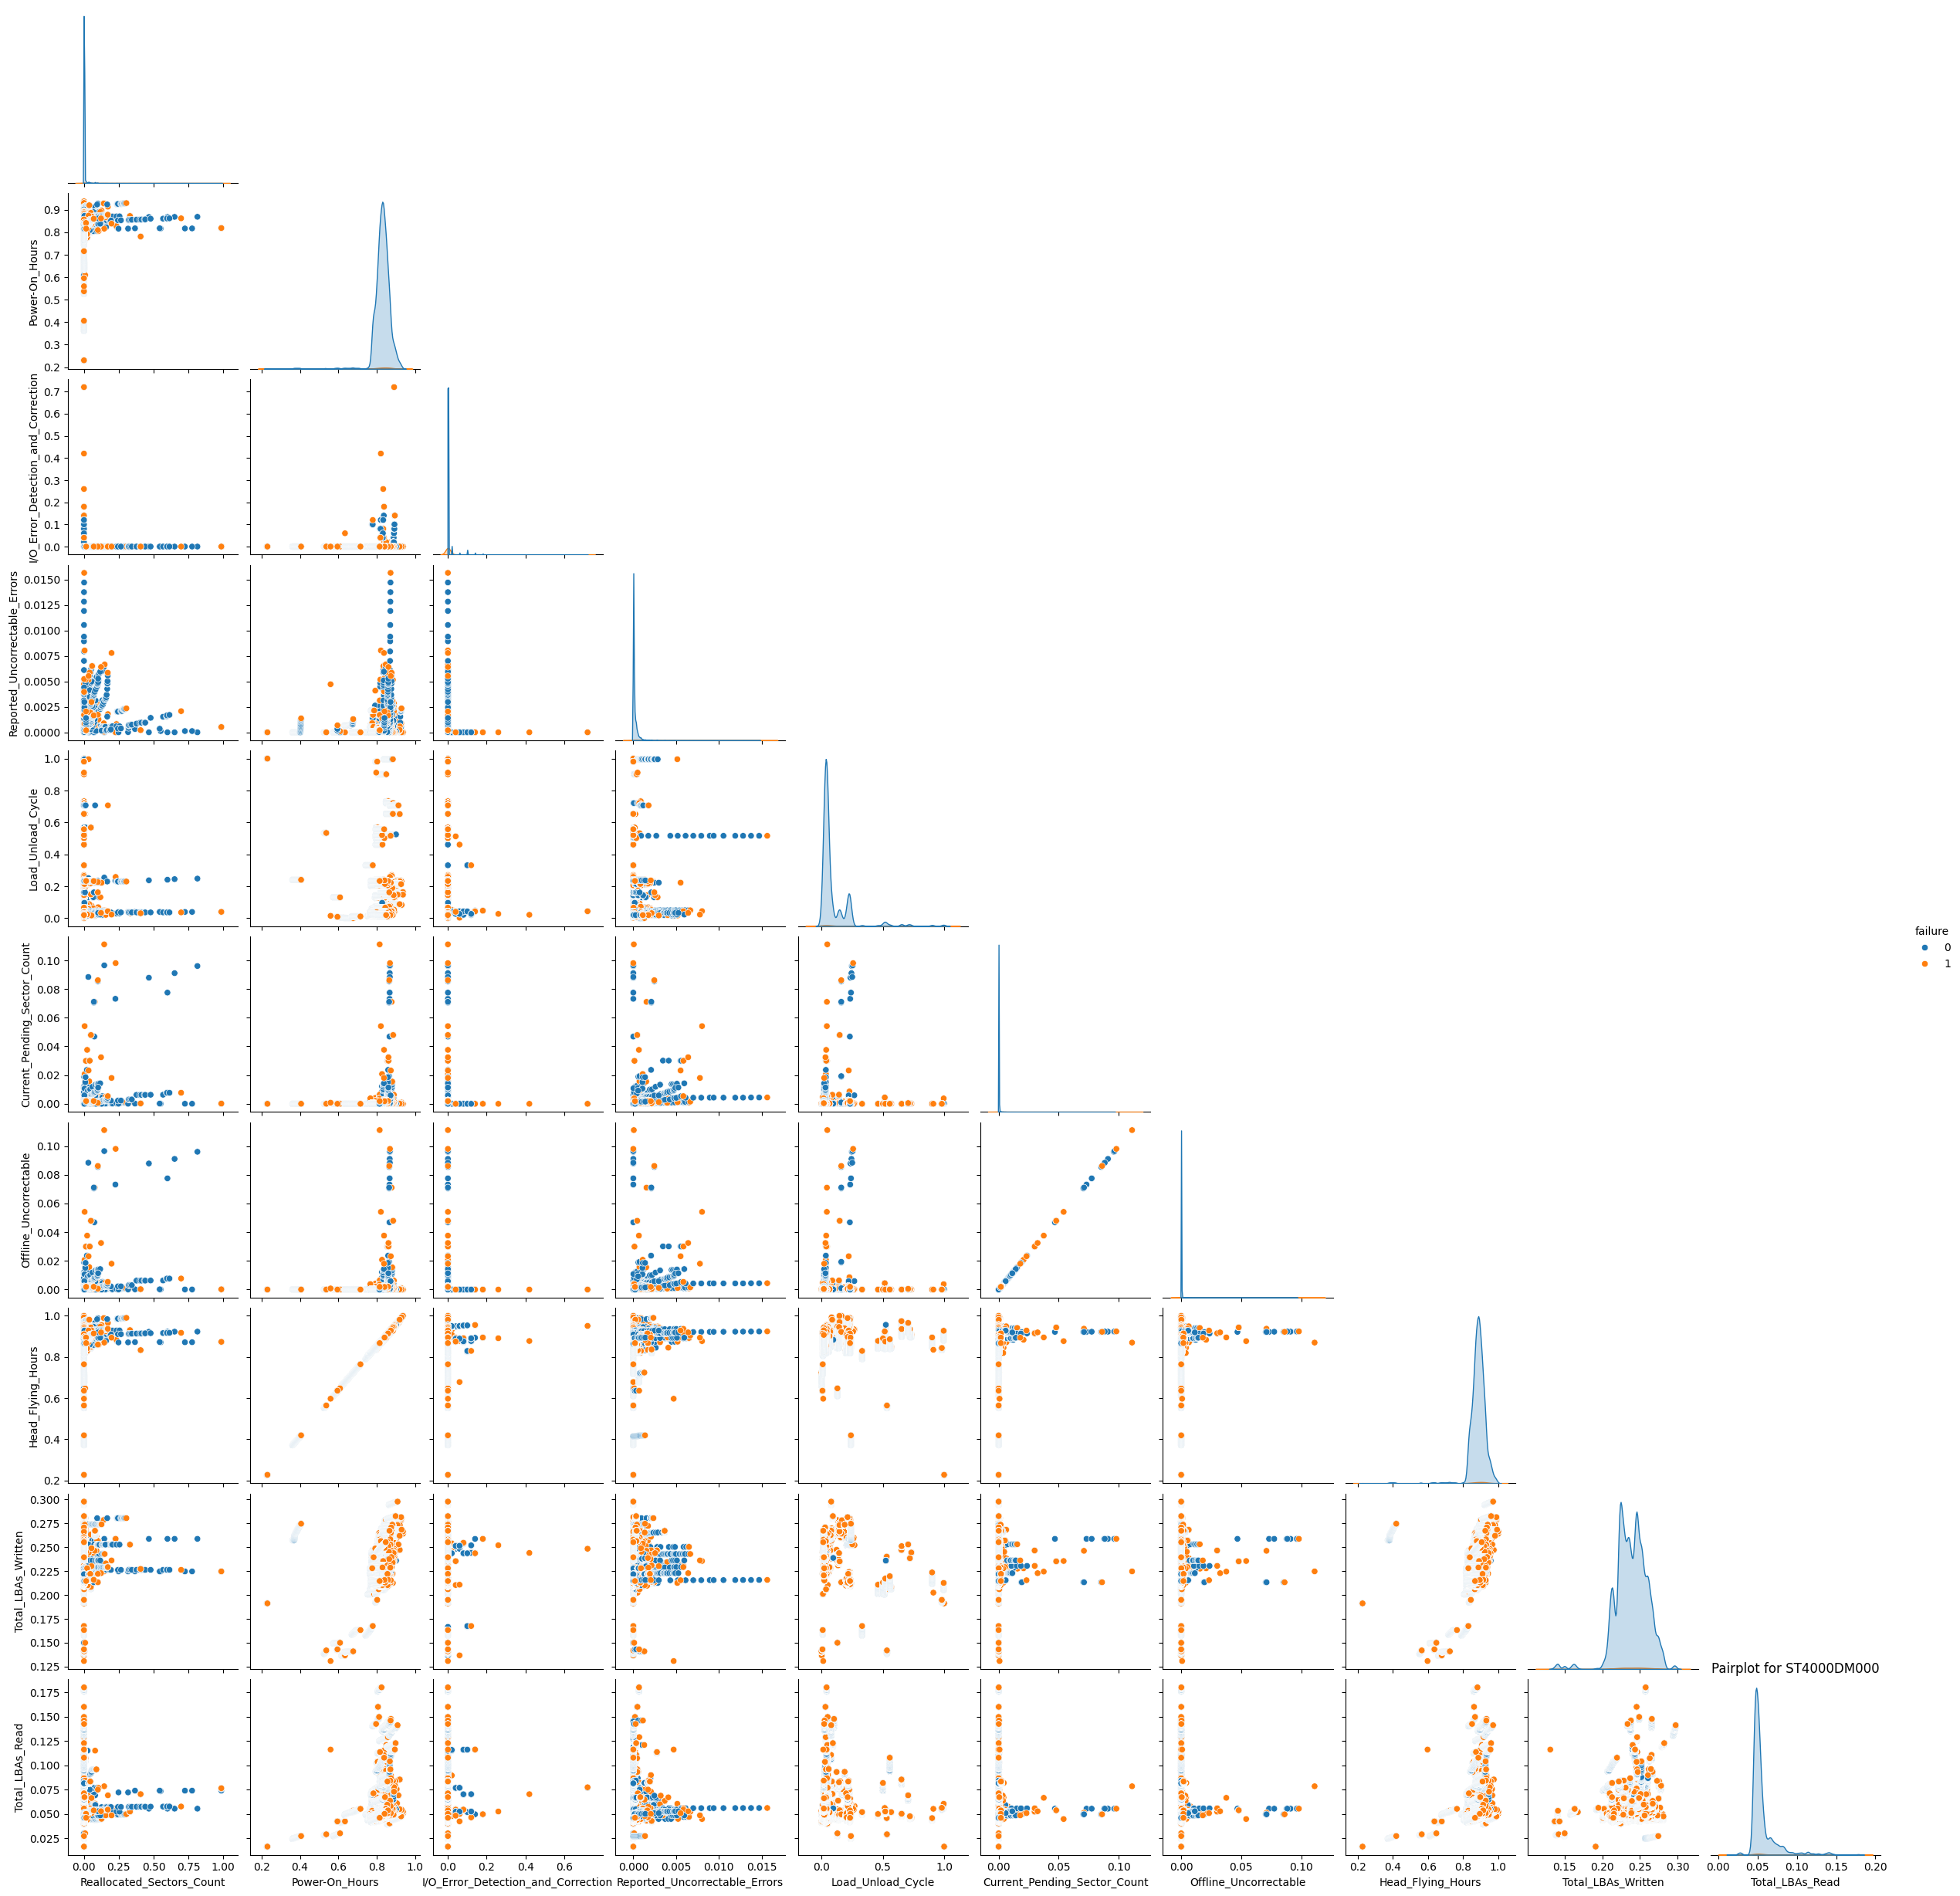

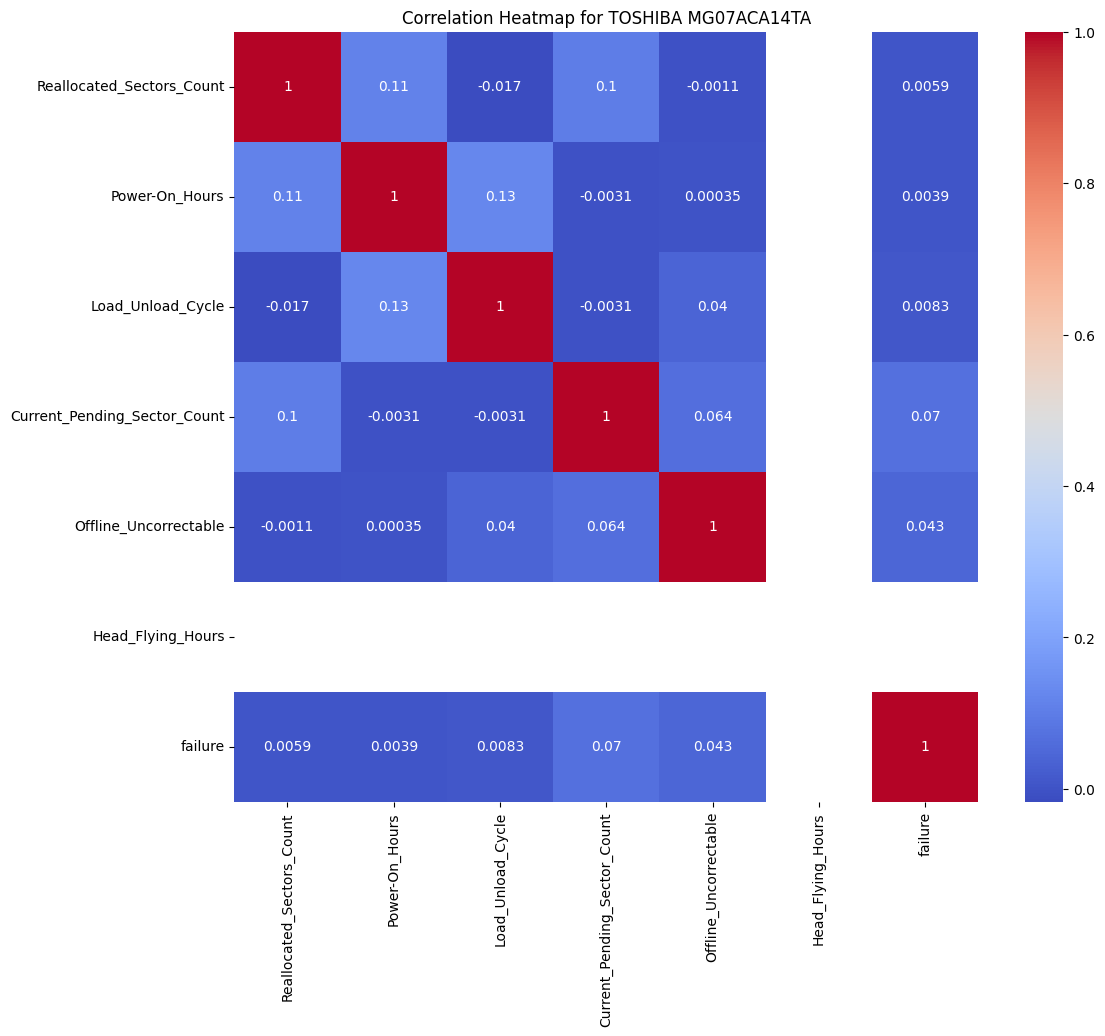

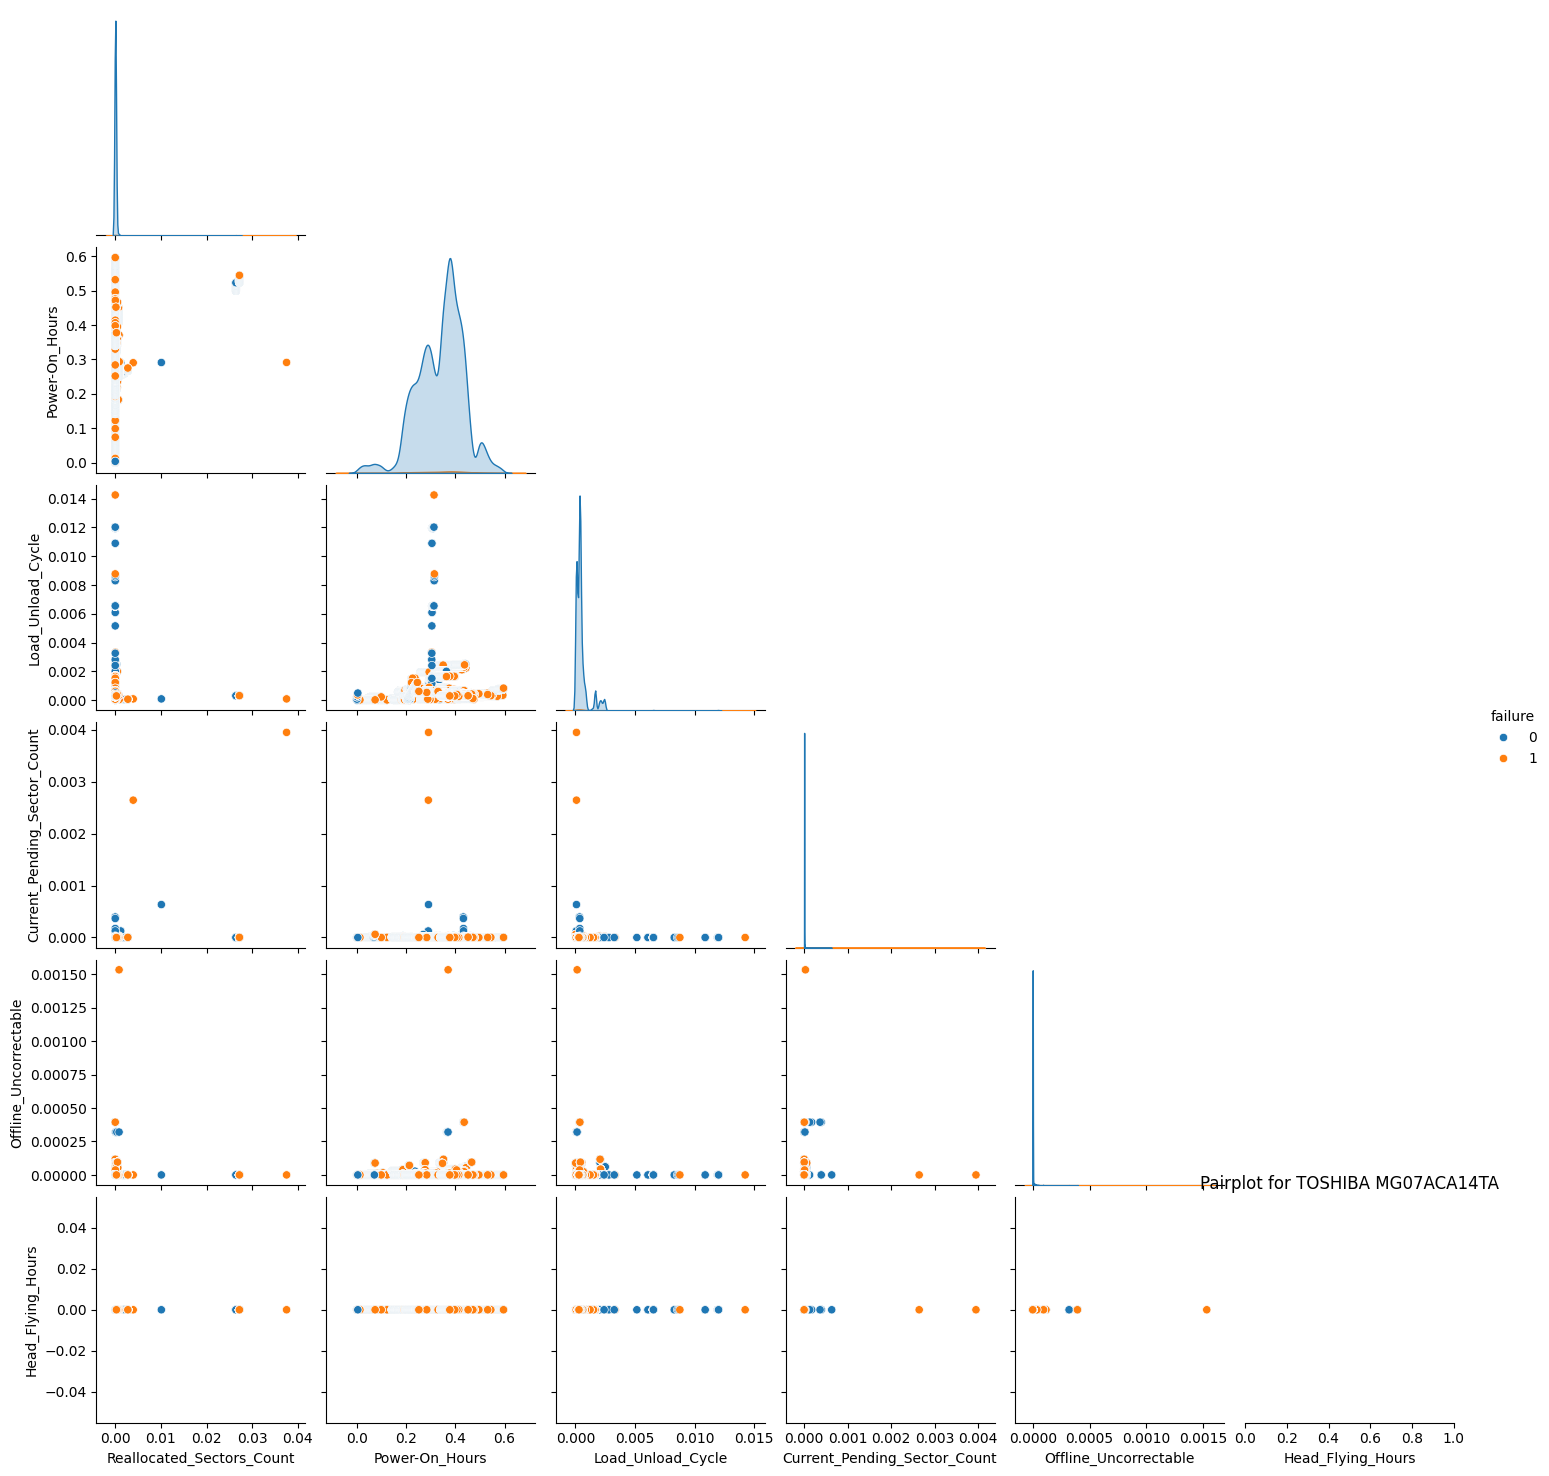

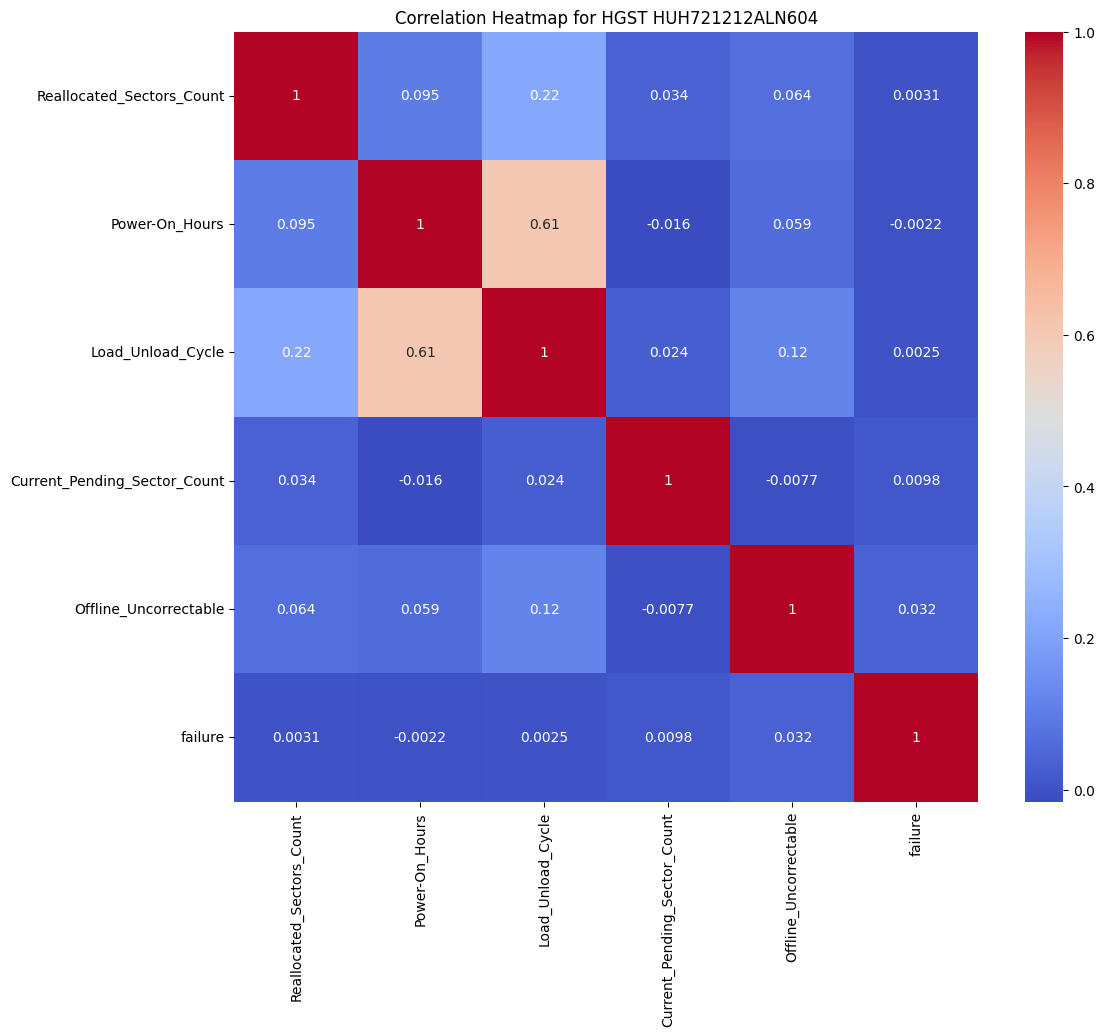

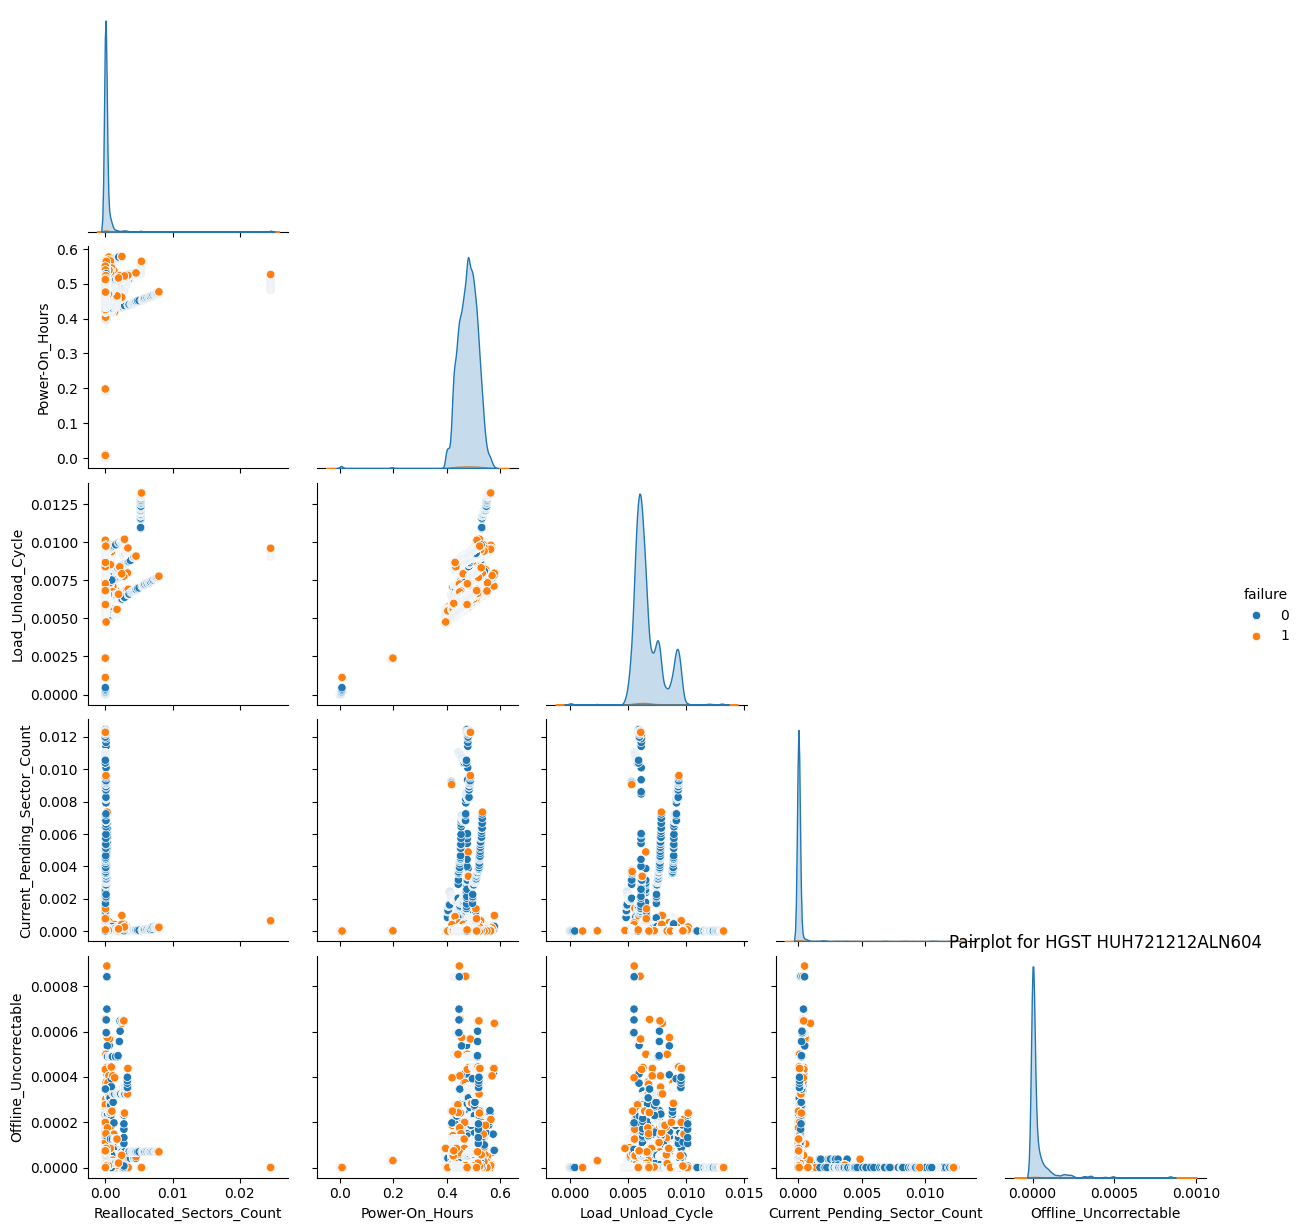

In [7]:
for dev_models in model_df['model']:
    model_data = get_model_data(df, dev_models)
    model_data = get_clean_data(model_data)
    map_model_data(model_data, dev_models)
    pairplot_model_data(model_data, dev_models)